In [29]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [30]:
%cd /content/drive/My Drive/

/content/drive/My Drive


In [31]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers  import Conv2D, MaxPooling2D, Flatten,Dense
from tensorflow.keras import layers
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from sklearn.metrics import classification_report, log_loss, accuracy_score
from sklearn.model_selection import train_test_split

In [32]:
dir_train='/content/drive/MyDrive/Colab Notebooks/Lion_tiger/train'
dir_test='/content/drive/MyDrive/Colab Notebooks/Lion_tiger/test'

#####Image data generator with data augmentation

In [33]:
Name=[]
for file in os.listdir(dir_train):
    Name+=[file]
print(Name)
print(len(Name))

['tiger', 'lion']
2


In [34]:
N=[]
for i in range(len(Name)):
    N+=[i]

normal_mapping=dict(zip(Name,N))
reverse_mapping=dict(zip(N,Name))

def mapper(value):
    return reverse_mapping[value]

In [35]:
dataset=[]
count=0
for name in Name:
    path=os.path.join(dir_train,name)
    for im in os.listdir(path):
        if im[-4:]=='.png':
            # Removed the 'grayscale' parameter as it is not supported.
            image=load_img(os.path.join(path,im), color_mode='rgb', target_size=(100,100))
            image=img_to_array(image)
            image=image/255.0
            dataset.append([image,count])
    count=count+1

In [36]:
testset=[]
count=0
for name in Name:
    path=os.path.join(dir_test,name)
    for im in os.listdir(path):
        if im[-4:]=='.png':
            image=load_img(os.path.join(path,im), color_mode='rgb', target_size=(100,100)) # Removed the 'grayscale' parameter as it is not supported.
            image=img_to_array(image)
            image=image/255.0
            testset.append([image,count])
    count=count+1

In [37]:
data,labels0=zip(*dataset)
test,tlabels0=zip(*testset)

In [38]:
labels1=to_categorical(labels0)
data=np.array(data)
labels=np.array(labels1)

In [39]:
tlabels1=to_categorical(tlabels0)
test=np.array(test)
tlabels=np.array(tlabels1)

In [40]:
trainx,testx,trainy,testy=train_test_split(data,labels,test_size=0.2,random_state=44)

In [41]:
print(trainx.shape)
print(testx.shape)
print(trainy.shape)
print(testy.shape)

(288, 100, 100, 3)
(72, 100, 100, 3)
(288, 2)
(72, 2)


In [42]:
datagen = ImageDataGenerator(horizontal_flip=True,vertical_flip=True,rotation_range=50,zoom_range=0.5,width_shift_range=0.2,height_shift_range=0.2,shear_range=0.2,fill_mode="nearest")

In [43]:
pretrained_model3 = tf.keras.applications.DenseNet121(input_shape=(100,100,3),include_top=False,weights='imagenet',pooling='avg')
pretrained_model3.trainable = False

In [44]:
inputs3 = pretrained_model3.input
x3 = tf.keras.layers.Dense(128, activation='relu')(pretrained_model3.output)
outputs3 = tf.keras.layers.Dense(2, activation='softmax')(x3)
model = tf.keras.Model(inputs=inputs3, outputs=outputs3)

In [45]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [46]:
his=model.fit(datagen.flow(trainx,trainy,batch_size=32),validation_data=(testx,testy),epochs=50)

Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


9/9 ━━━━━━━━━━━━━━━━━━━━ 40s 2s/step - accuracy: 0.5399 - loss: 1.1340 - val_accuracy: 0.8056 - val_loss: 0.4450
Epoch 2/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 115ms/step - accuracy: 0.6954 - loss: 0.5983 - val_accuracy: 0.8750 - val_loss: 0.3127
Epoch 3/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 129ms/step - accuracy: 0.7383 - loss: 0.4817 - val_accuracy: 0.8472 - val_loss: 0.4362
Epoch 4/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 172ms/step - accuracy: 0.8231 - loss: 0.3806 - val_accuracy: 0.8056 - val_loss: 0.3478
Epoch 5/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 167ms/step - accuracy: 0.8395 - loss: 0.3591 - val_accuracy: 0.9028 - val_loss: 0.2351
Epoch 6/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 112ms/step - accuracy: 0.8659 - loss: 0.3040 - val_accuracy: 0.8056 - val_loss: 0.3363
Epoch 7/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 116ms/step - accuracy: 0.8556 - loss: 0.3459 - val_accuracy: 0.8750 - val_loss: 0.2267
Epoch 8/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 113ms/step - accuracy: 0.8128 - loss: 0.3547 - val_accuracy: 0.8750 - val_loss: 0.1996
Epoch

In [47]:
y_pred=model.predict(testx)
pred=np.argmax(y_pred,axis=1)
ground = np.argmax(testy,axis=1)
print(classification_report(ground,pred))

3/3 ━━━━━━━━━━━━━━━━━━━━ 21s 5s/step
              precision    recall  f1-score   support

           0       0.97      0.82      0.89        39
           1       0.82      0.97      0.89        33

    accuracy                           0.89        72
   macro avg       0.90      0.90      0.89        72
weighted avg       0.90      0.89      0.89        72



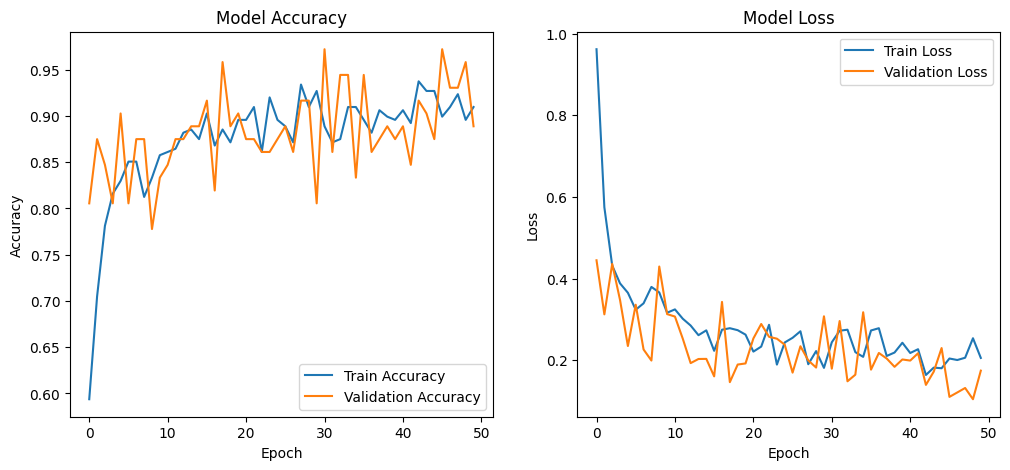

In [48]:
def plot_history(his):
 plt.figure(figsize=(12, 5))
 plt.subplot(1, 2, 1)
 # access the 'history' attribute of the History object, not 'his'
 plt.plot(his.history['accuracy'], label='Train Accuracy')
 plt.plot(his.history['val_accuracy'], label='Validation Accuracy')
 plt.title('Model Accuracy')
 plt.ylabel('Accuracy')
 plt.xlabel('Epoch')
 plt.legend(loc='lower right')

 plt.subplot(1, 2, 2)
 # access the 'history' attribute of the History object, not 'his'
 plt.plot(his.history['loss'], label='Train Loss')
 plt.plot(his.history['val_loss'], label='Validation Loss')
 plt.title('Model Loss')
 plt.ylabel('Loss')
 plt.xlabel('Epoch')
 plt.legend(loc='upper right')
 plt.show()
plot_history(his)

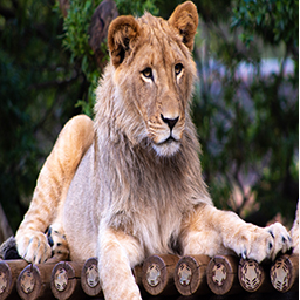

In [49]:
load_img("/content/drive/MyDrive/Colab Notebooks/Lion_tiger/test/lion/184.png",target_size=(300,300))

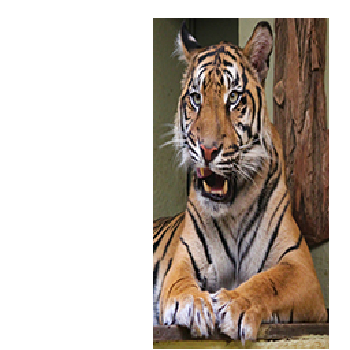

In [50]:
load_img("/content/drive/MyDrive/Colab Notebooks/Lion_tiger/test/tiger/183.png",target_size=(350,350))

In [51]:
image=load_img("/content/drive/MyDrive/Colab Notebooks/Lion_tiger/test/lion/185.png",target_size=(100,100))
image=img_to_array(image)
image=image/255.0
prediction_image=np.expand_dims(image,axis=0)

In [52]:
prediction=model.predict(prediction_image)
value=np.argmax(prediction)
name=mapper(value)
print("Prediction is {}.".format(name))

1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step
Prediction is lion.


In [53]:
print(test.shape)
prediction2=model.predict(test)
print(prediction2.shape)

PRED=[]
for item in prediction2:
    value2=np.argmax(item)
    PRED+=[value2]

(40, 100, 100, 3)
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
(40, 2)


In [54]:
ANS=tlabels0

In [55]:
accuracy=accuracy_score(ANS,PRED)
print(accuracy)

0.475
